In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt  
from scipy.spatial.distance import pdist,squareform

In [2]:
def cacu_pi(cacu_list,dc):
    pi_dist=0
    for icacu in cacu_list:
        pi_dist=pi_dist+np.exp(-np.square(icacu/dc))
    return pi_dist

In [3]:
def pi_epsi_value(X1,ct=0.02):
# ct=0.02
    all_dist=pdist(X1,'euclidean') # distince
    order_dist=squareform(all_dist) # save as matrix
    all_dist.sort(axis=0) # distince sort
    dc=all_dist[int(ct*0.5*len(X1)*(len(X1)-1))] # dc
    pi_all=[]
    for inum in range(len(X1)):
        cacu_list=[i for i in order_dist[inum]]
        cacu_list.remove(cacu_list[inum])
        pi_all.append(cacu_pi(cacu_list,dc))

    epsi_all=[]
    max_index=pi_all.index(np.max(pi_all))
    max_dist=np.max(order_dist[max_index])
    for inum in range(len(X1)):
        if pi_all[inum]==np.max(pi_all):
            epsi_value=max_dist
        else:
            dist_temp=list(order_dist[inum])
            epsi_value=np.min([dist_temp[ilen] for ilen in range(len(order_dist[inum])) if pi_all[ilen]>pi_all[inum]])
        epsi_all.append(epsi_value)
    return pi_all,epsi_all,order_dist


In [4]:
def plot_results(X1,index_list):
    plt.scatter(X1[:, 0], X1[:, 1], marker='x', c=Y1)  
    for i in index_list:
        plt.scatter(X1[i, 0],X1[i, 1],marker='o')
    plt.show()
    return index_list

In [5]:
def find_nearest_deeper(pi_dict,order_dist,pi_nums,lable_set,cluster_label):
    pi_value=pi_dict.get(pi_nums)
    deeper_list=[i[0] for i in pi_dict.items() if i[1] > pi_value ]
    if pi_nums in lable_set:
    #     cluster_label
        return cluster_label
    else:
        distance_list=[order_dist[pi_nums][dnum] for dnum in deeper_list]
        label_num=deeper_list[distance_list.index(np.min(distance_list))]
        cluster_label[pi_nums]=cluster_label.get(label_num)
        return cluster_label

In [6]:
def get_cluster_label(index_list):
    cluster_label={}
    for i in range(len(index_list)):
        cluster_label[index_list[i]]=i
    pi_dict={inum:pi_all[inum] for inum in range(len(pi_all))}
    lable_set=set(index_list)
    sort_list_dict=sorted(pi_dict.items(), key=lambda d: d[1],reverse=True)
    for isort in sort_list_dict:
        pi_nums=isort[0]
        cluster_label=find_nearest_deeper(pi_dict,order_dist,pi_nums,lable_set,cluster_label)
    return cluster_label

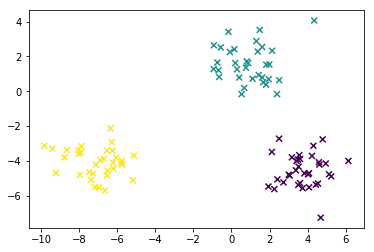

In [7]:
X1, Y1 = make_blobs(n_samples=100,n_features=2, centers=3)  
plt.scatter(X1[:, 0], X1[:, 1], marker='x', c=Y1)  
plt.show()

In [8]:
pi_all,epsi_all,order_dist=pi_epsi_value(X1,ct=0.02)

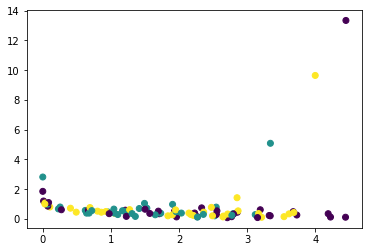

In [9]:
plt.scatter(pi_all, epsi_all, marker='o', c=Y1) 
plt.show()

In [10]:
index_list=[epsi_all.index(i) for i in epsi_all if i>4]

In [12]:
index_list

[6, 69, 80]

In [13]:
cluster_label=get_cluster_label(index_list)

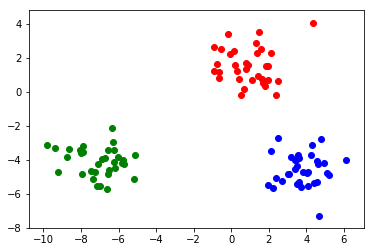

In [14]:
for p_num,cmaker in cluster_label.items():
    color_map={0:'r',1:'g',2:'b'}
    plt.scatter(X1[p_num, 0],X1[p_num, 1],marker='o',c=color_map.get(cmaker))
plt.show()

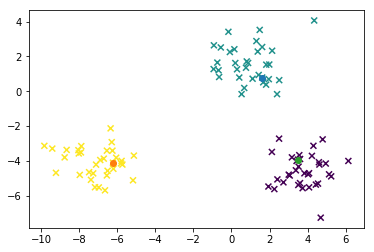

[6, 69, 80]

In [15]:
plot_results(X1,index_list)

In [352]:
!pwd

/Volumes/MacintoshHD/Lab/Badman/cluster_densty
